In [5]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from scipy import optimize
import astropy.units as u
import astropy.constants as c
from astropy.cosmology import Planck18 as cosmo

%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
t_CMB = cosmo.age(1100).value # [Gyr]
t_start = cosmo.age(45).value # [Gyr]
t_reion = cosmo.age(15).value # [Gyr]
t_now = cosmo.age(0).value # [Gyr]
print(f't_CMB = {t_CMB:.3e} Gyr')
print(f't_start = {t_start:.3e} Gyr')
print(f't_reion = {t_reion:.3e} Gyr')
print(f't_now = {t_now:.3e} Gyr')

t_CMB = 3.665e-04 Gyr
t_start = 5.446e-02 Gyr
t_reion = 2.683e-01 Gyr
t_now = 1.379e+01 Gyr


In [9]:
def t_evap(m): # [Gyr]([g])
    t = 5120 * np.pi * c.G**2 * (m*u.g)**3 / (c.hbar * c.c**4)
    return t.to(u.Gyr).value

In [13]:
m_decay_by_CMB = optimize.newton(lambda m: t_evap(m) - t_CMB, 1e14)
m_decay_by_start = optimize.newton(lambda m: t_evap(m) - t_start, 1e14)
m_decay_by_reion = optimize.newton(lambda m: t_evap(m) - t_reion, 1e14)
m_decay_by_now = optimize.newton(lambda m: t_evap(m) - t_now, 1e14)
print(f'm_decay_by_CMB = {m_decay_by_CMB:.3e} g')
print(f'm_decay_by_start = {m_decay_by_start:.3e} g')
print(f'm_decay_by_reion = {m_decay_by_reion:.3e} g')
print(f'm_decay_by_now = {m_decay_by_now:.3e} g')

m_decay_by_CMB = 5.162e+12 g
m_decay_by_start = 2.734e+13 g
m_decay_by_reion = 4.652e+13 g
m_decay_by_now = 1.729e+14 g


In [29]:
def dcdm_f_bound(t): # [1]([Gyr])
    return np.where(t > t_univ, 6.3e-3 * t, 0.038)

m_s = np.geomspace(5e13, 1e18, 1000) # [g]
t_s = t_evap(m_s) # [Gyr]
f_s = dcdm_f_bound(t_s) # [1]

Text(0, 0.5, '$f$ [1]')

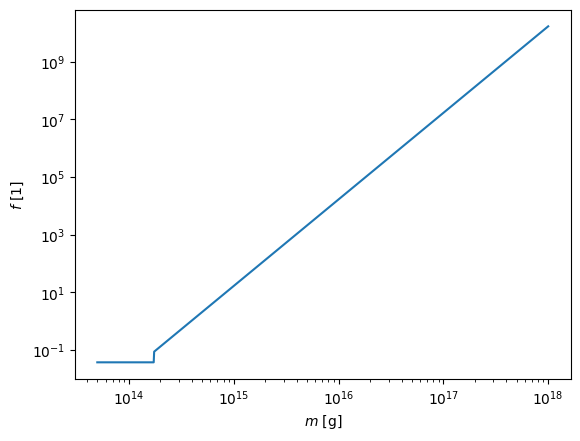

In [31]:
plt.plot(m_s, f_s)
plt.loglog()
plt.xlabel(r'$m$ [g]')
plt.ylabel(r'$f$ [1]')